In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# EDA

In [14]:
amsterdam = pd.read_csv("../data/clean/amsterdam.csv")
athens = pd.read_csv("../data/clean/athens.csv")
barcelona = pd.read_csv("../data/clean/barcelona.csv")
berlin = pd.read_csv("../data/clean/berlin.csv")
budapest = pd.read_csv("../data/clean/budapest.csv")
lisbon = pd.read_csv("../data/clean/lisbon.csv")
london = pd.read_csv("../data/clean/london.csv")
paris = pd.read_csv("../data/clean/paris.csv")
rome = pd.read_csv("../data/clean/rome.csv")
vienna = pd.read_csv("../data/clean/vienna.csv")
airbnb = pd.read_csv("../data/clean/airbnb_merged.csv")

In [15]:
airbnb

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,weekend,city
0,194.033698,Private room,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896,False,Amsterdam
1,344.245776,Private room,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757,False,Amsterdam
2,264.101422,Private room,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955,False,Amsterdam
3,433.529398,Private room,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098,False,Amsterdam
4,485.552926,Private room,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740,False,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,438.756874,True,Vienna
51703,304.793960,Entire home/apt,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,342.182813,True,Vienna
51704,637.168969,Entire home/apt,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,282.296424,True,Vienna
51705,301.054157,Private room,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,158.563398,True,Vienna


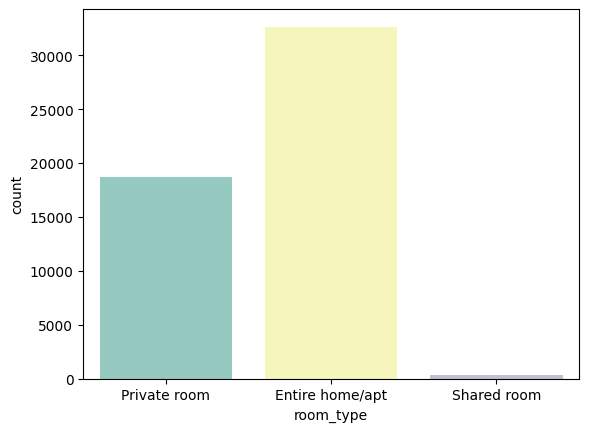

In [16]:
sns.countplot(data=airbnb, x='room_type', palette="Set3", hue='room_type', legend=False);

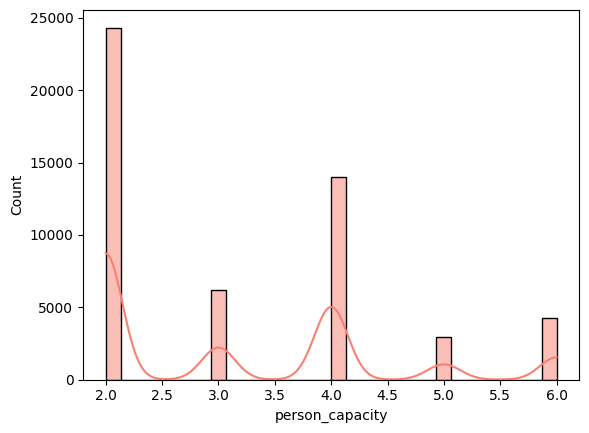

In [19]:
sns.histplot(airbnb['person_capacity'], kde=True, bins=30, color="salmon");

## Univariate

## Bivariate

In [6]:
numerical_columns = airbnb[["realSum" , "cleanliness_rating", "guest_satisfaction_overall", 
                            "dist", "metro_dist", "attr_index", "rest_index"]]

normalizer = MinMaxScaler()
num_norm = normalizer.fit_transform(numerical_columns)
df_norm = pd.DataFrame(num_norm, columns=numerical_columns.columns, index=airbnb.index)
df_norm

,realSum,cleanliness_rating,guest_satisfaction_overall,dist,metro_dist,attr_index,rest_index
0,0.008603,1.000,0.9125,0.198180,0.177775,0.014125,0.011784
1,0.016718,0.750,0.8125,0.018732,0.016614,0.136943,0.122473
2,0.012389,0.875,0.8375,0.226885,0.255711,0.013366,0.011355
3,0.021542,0.875,0.8750,0.014635,0.030661,0.106286,0.128128
4,0.024352,1.000,0.9750,0.020962,0.022170,0.119526,0.119182
...,...,...,...,...,...,...,...
51702,0.036798,1.000,1.0000,0.020386,0.009330,0.045405,0.062784
51703,0.014587,0.750,0.8250,0.031467,0.006905,0.042197,0.048319
51704,0.032543,1.000,0.9125,0.038743,0.014031,0.034217,0.039349
51705,0.014385,1.000,0.8375,0.119870,0.019980,0.020915,0.020817


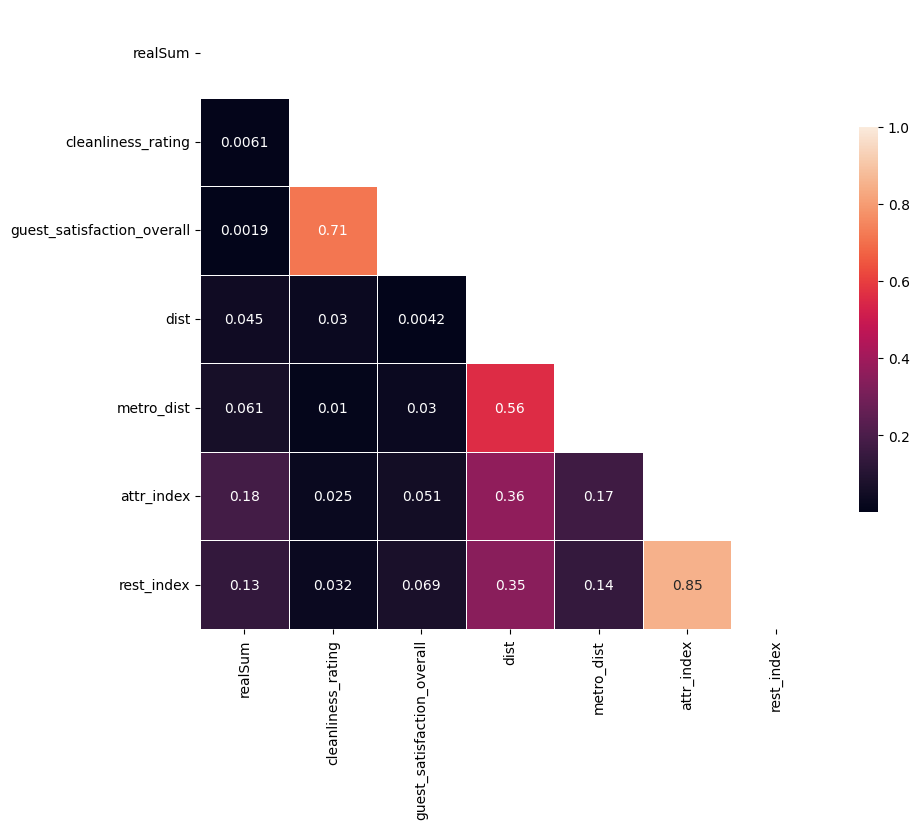

In [7]:
corr=np.abs(df_norm.corr()) 

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

# Factors (weekend, city, services...) that affect client satisfaction 

# Factors (weekend, city, services...) that affect prices 